# Giới thiệu về Xác suất và Thống kê
Trong sổ tay này, chúng ta sẽ thử nghiệm một số khái niệm mà chúng ta đã thảo luận trước đó. Nhiều khái niệm từ xác suất và thống kê được thể hiện tốt trong các thư viện chính để xử lý dữ liệu trong Python, chẳng hạn như `numpy` và `pandas`.

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## Biến ngẫu nhiên và phân phối
Chúng ta hãy bắt đầu bằng cách lấy mẫu 30 giá trị từ phân phối đều từ 0 đến 9. Chúng ta cũng sẽ tính giá trị trung bình và phương sai.

In [4]:
sample = [ random.randint(0,9) for _ in range(30) ]
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}")

Sample: [7, 4, 3, 2, 4, 6, 9, 0, 1, 7, 7, 2, 9, 1, 7, 0, 2, 0, 9, 4, 2, 8, 7, 6, 4, 0, 0, 3, 4, 0]
Mean = 3.933333333333333
Variance = 9.195555555555556


Để ước tính trực quan có bao nhiêu giá trị khác nhau trong mẫu, chúng ta có thể vẽ **biểu đồ histogram**:

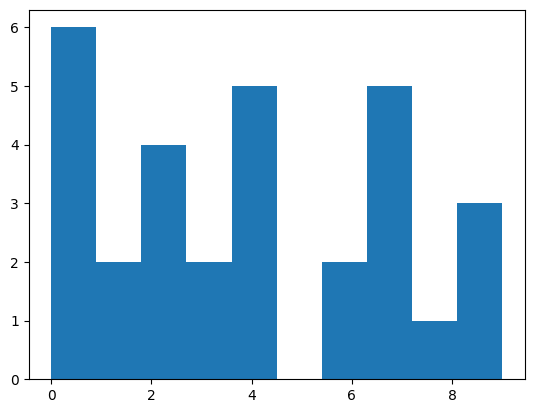

In [5]:
plt.hist(sample)
plt.show()

## Phân tích dữ liệu trong thực tế

Giá trị trung bình và phương sai rất quan trọng khi phân tích dữ liệu thực tế. Hãy tải dữ liệu về cầu thủ bóng chày từ Dataset [SOCR MLB Height/Weight Data](https://wiki.socr.umich.edu/index.php/SOCR_Data_MLB_HeightsWeights)

Từ url trên, ta sử dụng thư viện `request` để lấy nội dung rồi dùng thư viện [**Pandas**](https://pandas.pydata.org/) để đọc dữ liệu. Chúng ta sẽ nói thêm về Pandas và cách làm việc với dữ liệu trong Python ở phần sau của khóa học này.

In [9]:
import pandas as pd
import requests
from io import StringIO

# URL của dataset
url = 'https://wiki.socr.umich.edu/index.php/SOCR_Data_MLB_HeightsWeights'

# Gửi yêu cầu HTTP để lấy nội dung trang
response = requests.get(url)
response.raise_for_status()  # Kiểm tra lỗi

# Bao bọc nội dung HTML trong StringIO
html_content = StringIO(response.text)

# Đọc bảng HTML từ nội dung đã bao bọc
tables = pd.read_html(html_content)

# Chọn bảng phù hợp (ví dụ: bảng đầu tiên)
df = tables[0]

# Hiển thị 5 dòng đầu tiên của dataframe
print(df.head())


              Name Team       Position  Height(inches)  Weight(pounds)    Age
0    Adam_Donachie  BAL        Catcher              74             180  22.99
1        Paul_Bako  BAL        Catcher              74             215  34.69
2  Ramon_Hernandez  BAL        Catcher              72             210  30.78
3     Kevin_Millar  BAL  First_Baseman              72             210  35.43
4      Chris_Gomez  BAL  First_Baseman              73             188  35.71


Dùng hàm rename() để đổi tên các cột: Position ... thành Role, Height và Weight.

In [10]:
df.rename(columns={
    'Position': 'Role',
    'Height(inches)': 'Height',
    'Weight(pounds)': 'Weight'
}, inplace=True)

# Kiểm tra lại tên các cột sau khi đổi
print(df.columns)


Index(['Name', 'Team', 'Role', 'Height', 'Weight', 'Age'], dtype='object')


Hãy tính giá trị trung bình theo độ tuổi, chiều cao và cân nặng:

In [15]:
df[['Age','Height','Weight']].mean()

,0
Age,28.736712
Height,73.697292
Weight,201.716634


Bây giờ chúng ta hãy tập trung vào chiều cao và tính độ lệch chuẩn và phương sai (hiển thị 20 giá trị phổ biến nhất):

In [16]:
print(list(df['Height'])[:20])

[74, 74, 72, 72, 73, 69, 69, 71, 76, 71, 73, 73, 74, 74, 69, 70, 72, 73, 75, 78]


In [17]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 73.6972920696325
Variance = 5.316798081118081
Standard Deviation = 2.305818310517566


Ngoài giá trị trung bình, việc xem xét giá trị trung vị và tứ phân vị cũng có ý nghĩa. Chúng có thể được hình dung bằng cách sử dụng **box plot**:

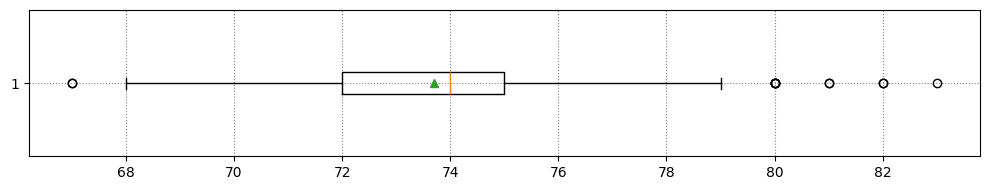

In [18]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

Chúng ta cũng có thể tạo biểu đồ hộp cho các trường khác trong tập dữ liệu trên, ví dụ như nhóm theo `Role` (vai trò của cầu thủ trên sân).

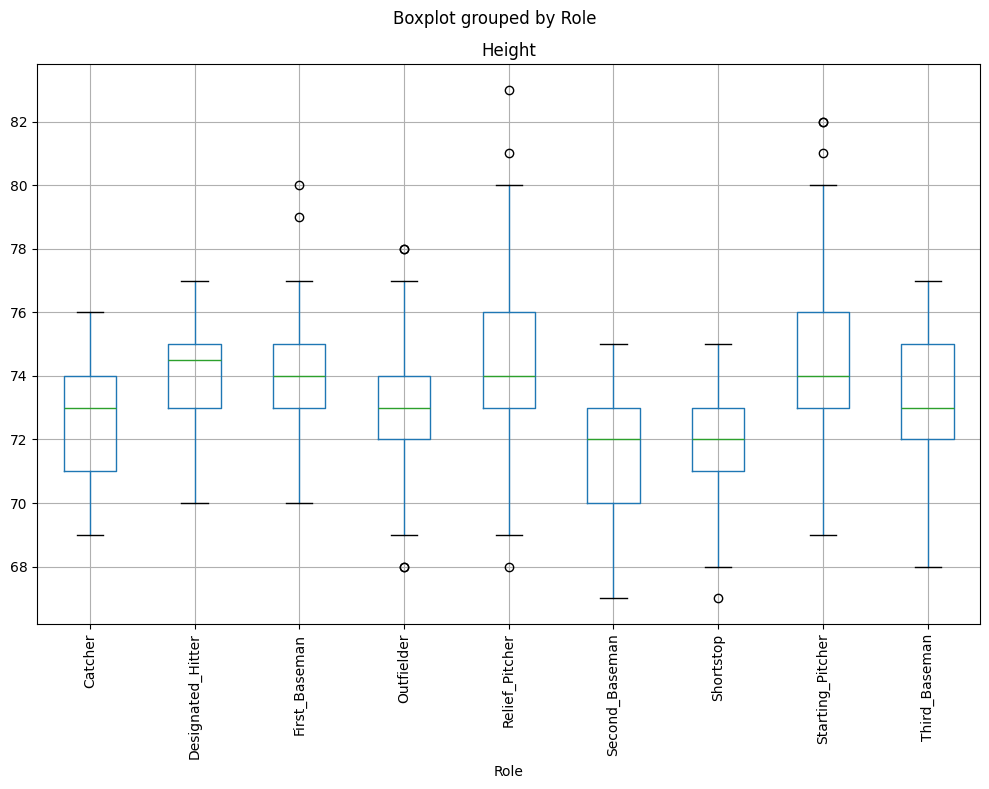

In [19]:
df.boxplot(column='Height', by='Role', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

> **Lưu ý:** Sơ đồ này cho thấy, trung bình, chiều cao của cầu thủ ở vị trí gôn đầu tiên cao hơn chiều cao của cầu thủ ở vị trí gôn thứ hai. Sau này chúng ta sẽ tìm hiểu cách kiểm tra giả thuyết này một cách chính thức hơn và cách chứng minh dữ liệu của chúng ta có ý nghĩa thống kê để chứng minh điều đó.

Tuổi, chiều cao và cân nặng đều là các biến ngẫu nhiên liên tục. Bạn nghĩ phân phối của chúng là gì? Một cách tốt để tìm ra là vẽ biểu đồ tần suất các giá trị:

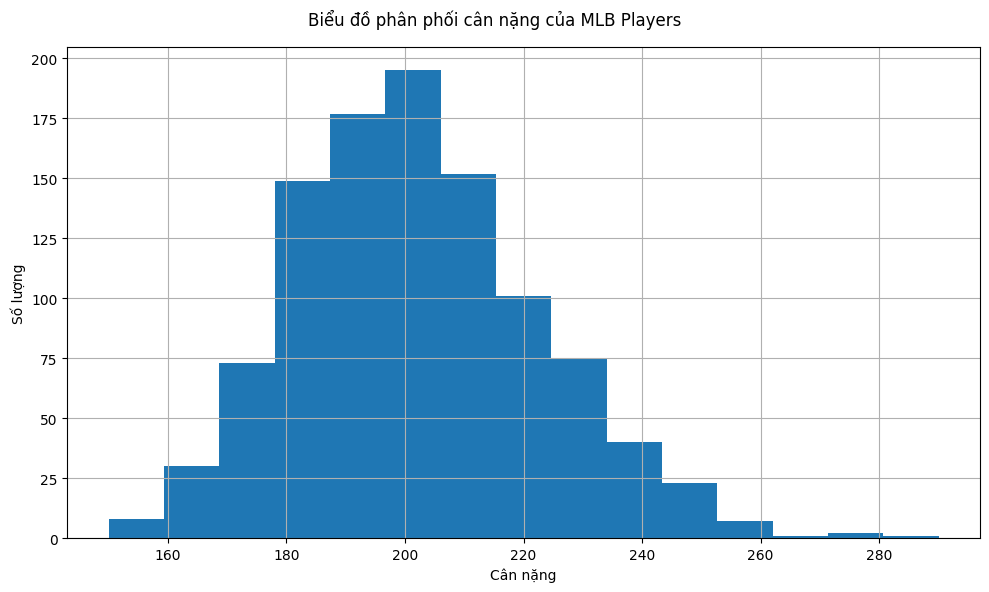

In [22]:
df['Weight'].hist(bins=15, figsize=(10,6))
plt.suptitle('Biểu đồ phân phối cân nặng của MLB Players')
plt.xlabel('Cân nặng')
plt.ylabel('Số lượng')
plt.tight_layout()
plt.show()

## Normal Distribution - Phân phối chuẩn

Hãy tạo ngẫu nhiên một mẫu dữ liệu về cân nặng tuân theo phân phối chuẩn với cùng giá trị trung bình và phương sai như dữ liệu thực của chúng ta:

In [23]:
generated = np.random.normal(mean, std, 1000)
generated[:20]

array([73.56575291, 74.69885983, 72.83158535, 70.26756394, 75.22511682,
       75.53373991, 75.97218353, 75.5651202 , 79.56911615, 69.25065952,
       75.08523493, 73.25575016, 76.44564556, 74.70384728, 75.63526458,
       75.61562908, 74.36816803, 73.73224819, 70.99340067, 74.33213816])

Sau đó vẽ biểu đồ Histogram với bin (bước nhảy cân nặng) là 15.

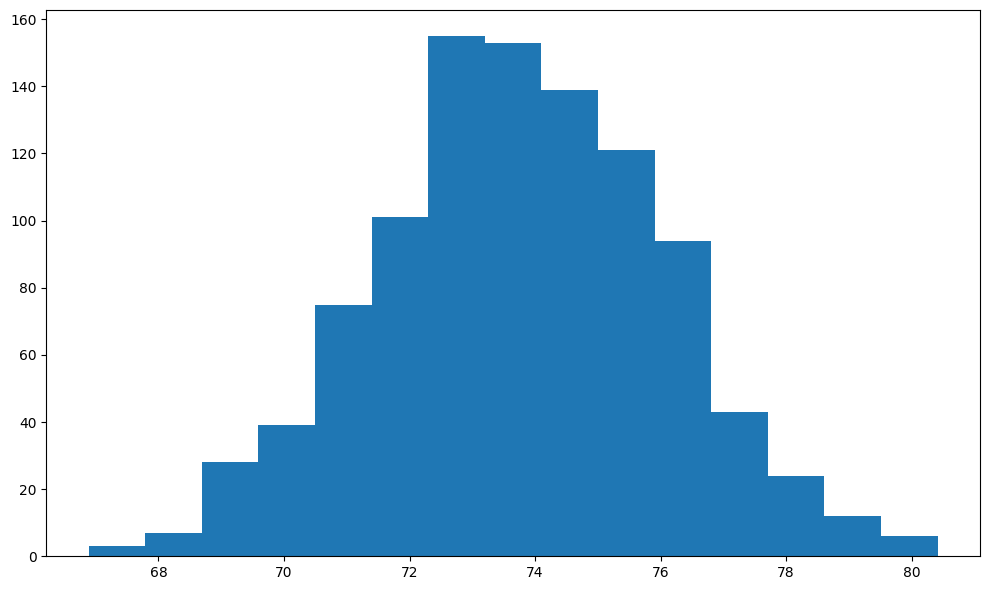

In [24]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=15)
plt.tight_layout()
plt.show()

Chúng ta thử tăng số lượng mẫu ngẫu nhiên lên 50.000 mẫu và số bins lên 300

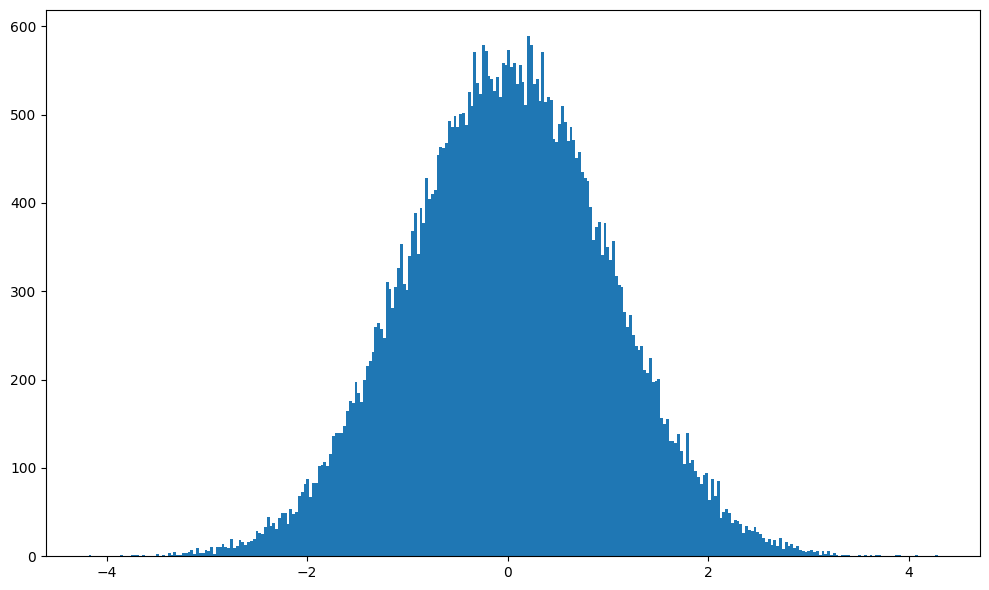

In [25]:
plt.figure(figsize=(10,6))
plt.hist(np.random.normal(0,1,50000), bins=300)
plt.tight_layout()
plt.show()

Vì hầu hết các giá trị trong đời thực đều phân phối chuẩn nên chúng ta không nên sử dụng trình tạo số ngẫu nhiên thống nhất để tạo dữ liệu mẫu. Sau đây là những gì xảy ra nếu chúng ta cố gắng tạo 1 mẫu ngẫu nhiên trọng lượng với phân phối đồng đều (được tạo bởi hàm `np.random.rand`):

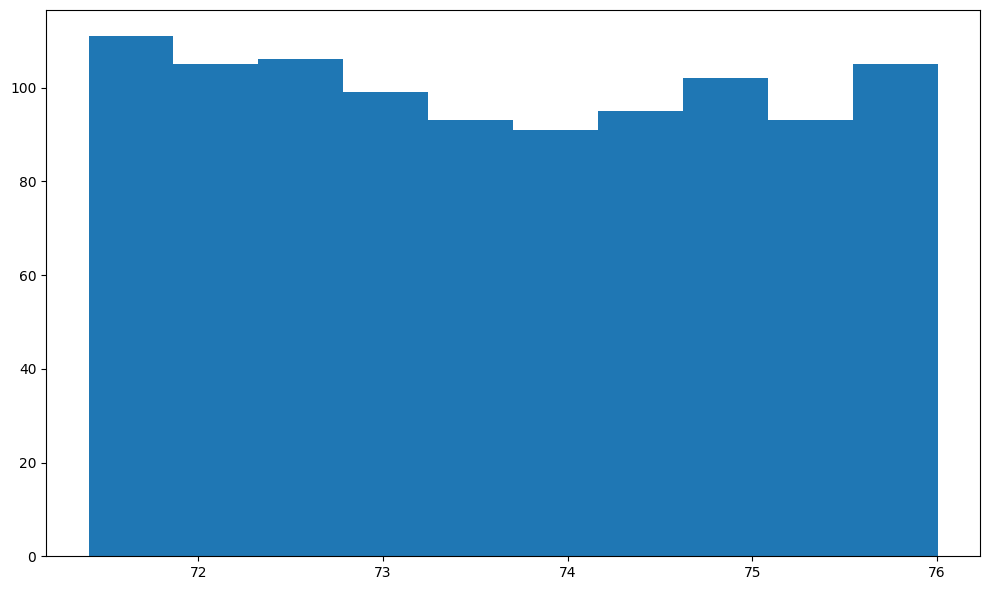

In [26]:
wrong_sample = np.random.rand(1000)*2*std+mean-std
plt.figure(figsize=(10,6))
plt.hist(wrong_sample)
plt.tight_layout()
plt.show()

## Confidence Intervals - Khoảng tin cậy

Bây giờ chúng ta hãy tính khoảng tin cậy cho cân nặng và chiều cao của cầu thủ bóng chày. Chúng ta sẽ sử dụng code từ [diễn đàn stackoverflow](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data):

In [28]:
import numpy as np
import pandas as pd
import scipy.stats

# Vẫn sử dụng DataFrame df ở trên, ta tạo ra hàm mean_conf_interval: tính toán ra khoảng tin cậy ở mỗi độ tin cậy cho trước, ví dụ p=0.95

def mean_confidence_interval(data, confidence=0.95):
    a = np.array(data, dtype=float)  # Chuyển đổi dữ liệu thành mảng numpy với kiểu float
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

# Sử dụng ffill() để điền các giá trị NaN bằng giá trị trước đó
df['Weight'] = df['Weight'].ffill()

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Weight'], p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")


p=0.85, mean = 201.72 ± 0.94
p=0.90, mean = 201.72 ± 1.08
p=0.95, mean = 201.72 ± 1.28


## Hypothesis Testing - Kiểm định giả thuyết

Hãy cùng khám phá những số liệu chiều cao, cân nặng trung bình đối với từng vị trí (Role) của các cầu thủ bóng chày:

In [31]:
df.groupby('Role').agg({ 'Height' : 'mean', 'Weight' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

,Height,Weight,Count
Role,,,
Catcher,72.723684,204.328947,76
Designated_Hitter,74.222222,220.888889,18
First_Baseman,74.000000,213.109091,55
Outfielder,73.010309,199.113402,194
Relief_Pitcher,74.374603,203.517460,315
Second_Baseman,71.362069,184.344828,58
Shortstop,71.903846,182.923077,52
Starting_Pitcher,74.719457,205.276018,221
Third_Baseman,73.044444,200.955556,45


Hãy kiểm tra giả thuyết rằng Cầu thủ Gôn số 1 cao hơn Cầu thủ Gôn số 2. Cách đơn giản nhất để thực hiện điều này là kiểm tra khoảng tin cậy (xem các khoảng này có bị lồng vào nhau hay không):

In [34]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Second_Baseman',['Height']],p)
    print(f'Độ tin cậy={p:.2f}, Chiều cao cầu thủ Gôn số 1: {m1-h1[0]:.2f} -> {m1+h1[0]:.2f}, Chiều cao cầu thủ Gôn số 2: {m2-h2[0]:.2f} -> {m2+h2[0]:.2f}')

Độ tin cậy=0.85, Chiều cao cầu thủ Gôn số 1: 73.62 -> 74.38, Chiều cao cầu thủ Gôn số 2: 71.04 -> 71.69
Độ tin cậy=0.90, Chiều cao cầu thủ Gôn số 1: 73.56 -> 74.44, Chiều cao cầu thủ Gôn số 2: 70.99 -> 71.73
Độ tin cậy=0.95, Chiều cao cầu thủ Gôn số 1: 73.47 -> 74.53, Chiều cao cầu thủ Gôn số 2: 70.92 -> 71.81


Chúng ta có thể thấy rằng các khoảng không chồng chéo lên nhau.

Một cách chính xác hơn về mặt thống kê để chứng minh giả thuyết là sử dụng **Student t-test**:

In [35]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Height']], df.loc[df['Role']=='Second_Baseman',['Height']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 7.65
P-value: 9.137321189738959e-12


Hai giá trị được trả về bởi hàm `ttest_ind` là:
* **p-value** là xác suất để hai phân phối có cùng giá trị trung bình (tức là có xảy ra khả năng để chiều cao cầu thủ số 2 cao bằng cầu thủ số 1 hay không). Trong trường hợp này, P-value rất nhỏ (thường ≤ 0,05) cho thấy sự khác biệt có ý nghĩa thống kê, nghĩa là có bằng chứng mạnh mẽ ủng hộ rằng cầu thủ gôn số 1 cao hơn.
* **T-value** dùng để xác định xem sự khác biệt giữa trung bình chiều cao cầu thủ gôn số 1 và số 2 có ý nghĩa thống kê hay không. Giá trị T càng lớn (dương hoặc âm), khả năng sự khác biệt giữa các trung bình không phải do ngẫu nhiên càng cao. Ngược lại, giá trị T gần bằng 0 cho thấy sự khác biệt có thể chỉ là do biến động ngẫu nhiên trong mẫu.

## Simulating a Normal Distribution with the Central Limit Theorem - Mô phỏng Phân phối chuẩn với Định lý giới hạn trung tâm

Trình tạo giả ngẫu nhiên trong Python được thiết kế để cung cấp cho chúng ta một phân phối đồng đều. Nếu chúng ta muốn tạo một trình tạo cho phân phối chuẩn, chúng ta có thể sử dụng định lý giới hạn trung tâm. Để có được giá trị phân phối chuẩn, chúng ta chỉ cần tính giá trị trung bình của một mẫu được tạo ra đồng đều.

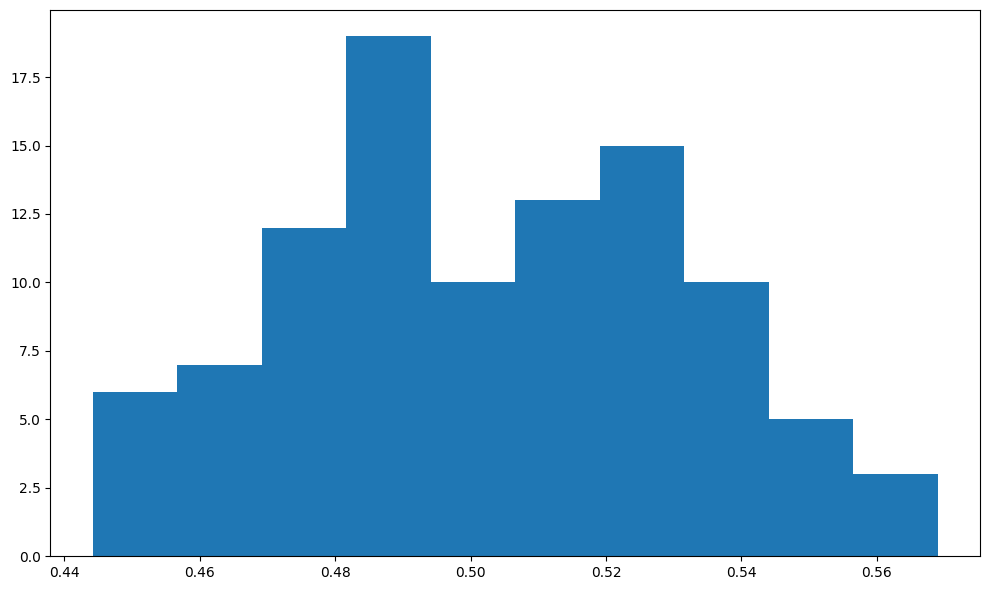

In [36]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample = [normal_random() for _ in range(100)]
plt.figure(figsize=(10,6))
plt.hist(sample)
plt.tight_layout()
plt.show()

## Correlation - sự tương quan và Tập đoàn Evil Baseball Corp

Tương quan cho phép chúng ta tìm mối quan hệ giữa các chuỗi dữ liệu. Trong ví dụ đồ chơi của chúng ta, hãy giả sử có một công ty bóng chày trả tiền cho các cầu thủ theo chiều cao của họ - cầu thủ càng cao thì càng nhận được nhiều tiền.

Giả sử có mức lương cơ bản là 1000 và tiền thưởng bổ sung từ 0 đến 100 đô la, tùy thuộc vào chiều cao. Chúng ta sẽ lấy những cầu thủ thực sự từ MLB và tính mức lương tưởng tượng của họ:

In [37]:
heights = df['Height']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights, salaries))[:10])

[(74, 1075.2469071629068), (74, 1075.2469071629068), (72, 1053.7477908306478), (72, 1053.7477908306478), (73, 1064.4973489967772), (69, 1021.4991163322591), (69, 1021.4991163322591), (71, 1042.9982326645181), (76, 1096.746023495166), (71, 1042.9982326645181)]


Bây giờ chúng ta hãy tính toán hiệp phương sai và tương quan của các chuỗi đó. `np.cov` sẽ cung cấp cho chúng ta cái gọi là **ma trận hiệp phương sai**, là phần mở rộng của hiệp phương sai đa biến. Phần tử Mij của ma trận hiệp phương sai M là mối tương quan giữa các biến đầu vào Xi và Xj, và các giá trị đường chéo Mii là phương sai của Xi. Tương tự, `np.corrcoef` sẽ cung cấp cho chúng ta **ma trận tương quan**.

In [38]:
print(f"Covariance matrix:\n{np.cov(heights, salaries)}")
print(f"Covariance = {np.cov(heights, salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Covariance matrix:
[[  5.31679808  57.15323023]
 [ 57.15323023 614.37197275]]
Covariance = 57.1532302305447
Correlation = 1.0


Hệ số tương quan bằng 1 có nghĩa là có mối **quan hệ tuyến tính** mạnh giữa hai biến. Chúng ta có thể thấy mối quan hệ tuyến tính bằng cách vẽ đồ thị một giá trị so với giá trị kia:

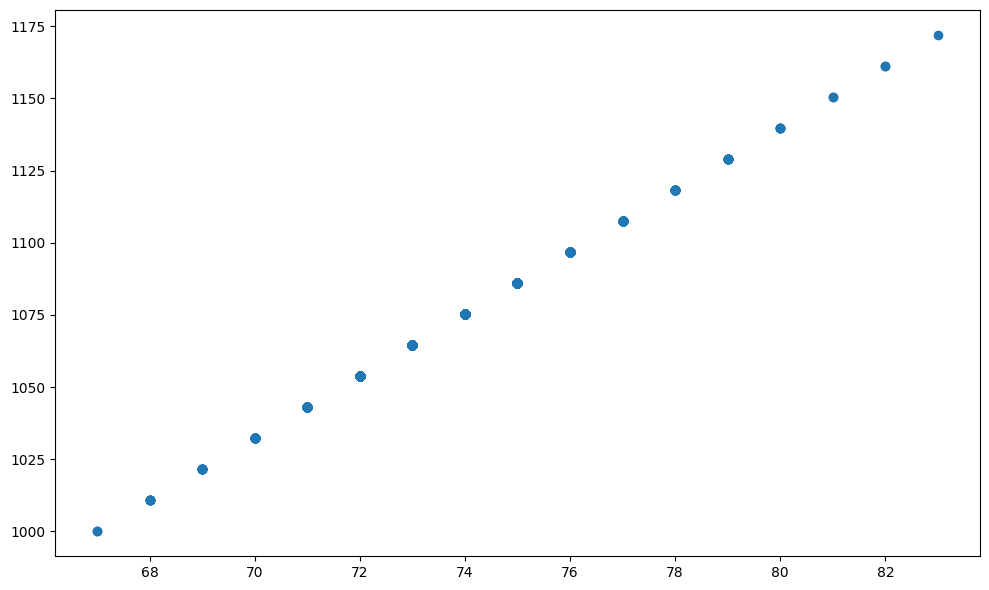

In [39]:
plt.figure(figsize=(10,6))
plt.scatter(heights,salaries)
plt.tight_layout()
plt.show()

Hãy xem điều gì xảy ra nếu mối **quan hệ phi tuyến tính**. Giả sử rằng công ty của chúng ta quyết định ẩn sự phụ thuộc tuyến tính rõ ràng giữa chiều cao và mức lương, và đưa một số tính phi tuyến tính vào công thức, chẳng hạn như hàm `sin`:

In [40]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9835304456670827


Trong trường hợp này, mối tương quan nhỏ hơn một chút, nhưng vẫn khá cao. Bây giờ, để làm cho mối quan hệ này ít rõ ràng hơn, chúng ta có thể muốn thêm một số tính ngẫu nhiên bằng cách thêm **một số biến ngẫu nhiên** vào mức lương. Hãy xem điều gì xảy ra:

In [41]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9339965436849635


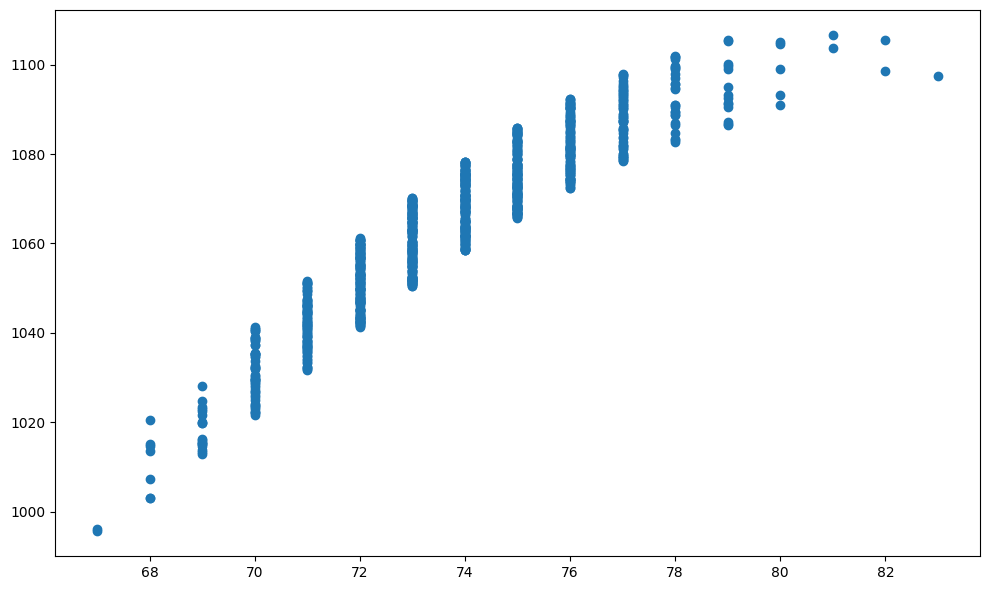

In [42]:
plt.figure(figsize=(10,6))
plt.scatter(heights, salaries)
plt.tight_layout()
plt.show()

> Bạn có thể đoán tại sao các chấm lại xếp thành đường thẳng đứng như thế này không?

Chúng ta đã quan sát mối tương quan giữa một khái niệm được thiết kế nhân tạo như `lương` và `chiều cao` biến quan sát được. Chúng ta cũng hãy xem liệu hai biến quan sát được, chẳng hạn như `chiều cao` và `cân nặng`, có tương quan với nhau không:

In [43]:
np.corrcoef(df['Height'],df['Weight'])

array([[1.        , 0.53031802],
       [0.53031802, 1.        ]])

Lưu ý: Trường hợp không nhận được kết quả nào - chỉ có hiện ra `nan` N/A không xác định. Điều này là do một số giá trị trong chuỗi của chúng tôi không xác định, được biểu diễn dưới dạng `nan`, khiến kết quả của phép toán cũng không xác định. Khi nhìn vào ma trận, chúng ta có thể thấy rằng `Cân nặng` là cột có vấn đề, vì đã tính toán được mối tương quan tự thân giữa các giá trị `Chiều cao`.


> Ví dụ này cho thấy tầm quan trọng của việc **chuẩn bị và làm sạch dữ liệu**. Nếu không có dữ liệu phù hợp, chúng ta không thể tính toán được bất cứ điều gì.

Hãy sử dụng hàm `ffill()` để điền các giá trị còn thiếu và tính toán mối tương quan:

In [46]:
np.corrcoef(df['Height'],df['Weight'].ffill())

array([[1.        , 0.53031802],
       [0.53031802, 1.        ]])

Thực tế giữa `cân nặng` và `chiều cao` là mối tương quan, nhưng không mạnh như trong ví dụ dữ liệu ngẫu nhiên của chúng ta. Thật vậy, nếu chúng ta nhìn vào biểu đồ phân tán của một giá trị so với giá trị kia, mối quan hệ sẽ kém rõ ràng hơn nhiều:

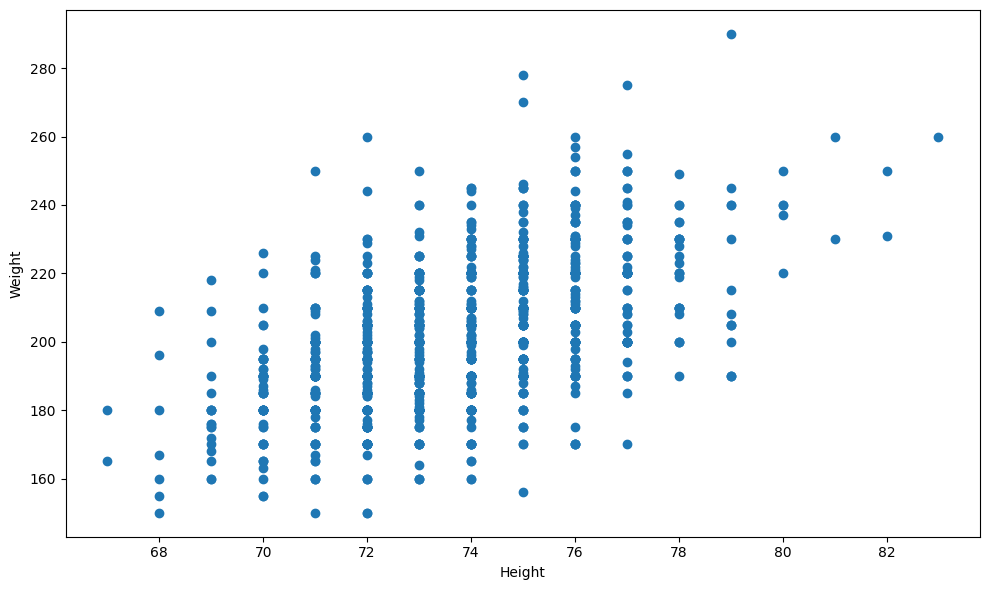

In [45]:
plt.figure(figsize=(10,6))
plt.scatter(df['Height'],df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.tight_layout()
plt.show()

## Conclusion - Kết luận

Trong sổ tay này, chúng ta đã học cách thực hiện các phép tính cơ bản trên dữ liệu để tính toán các hàm thống kê. Bây giờ chúng ta biết cách sử dụng công cụ toán học và thống kê vững chắc để chứng minh một số giả thuyết và cách tính khoảng tin cậy cho các biến tùy ý dựa trên mẫu dữ liệu.